In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy import signal
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
# read all file names  
filenames = os.listdir(path="./data/")

In [4]:
# raed center of frequencies
center_of_frequencies = []
for filename in filenames:
    center_of_frequency = float(filename[9:14])/10
    center_of_frequencies.append(center_of_frequency)

In [5]:
# Power Function

def power_function(iq_array):

    #print("Reading file ...")

    signal_voltage = np.sqrt( iq_array[:,0]**2 + iq_array[:,1]**2)
    
    return signal_voltage

In [6]:
#read all files

signal_voltages = []
for filename in filenames:
    fs, data = wavfile.read("./data/"+filename)
    newsignal = power_function(data)
    signal_voltages.append([fs, newsignal])

In [7]:
# convert all signal voltages to frequency and spectrum

frequencies = []
spectrums = []
for fs, signal_voltage in signal_voltages:
    frequency, spectrum = signal.welch(signal_voltage, fs, nperseg=1024)
    frequencies.append(frequency)
    spectrums.append(spectrum)
    print ("done")

done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done


In [8]:
# filter overlape frequencies

# filter with cutting end of the current frequency 
# that has overlap with next frequency 
filtered_frequencies = []
filtered_spectrums = []
for i in range(len(frequencies)-1):
    index_of_cut = np.where(frequencies[i]/1e6 + center_of_frequencies[i] >= center_of_frequencies[i+1])[0][0]
    
    filtered_frequencies.append(frequencies[i][3:index_of_cut]/1e6 + center_of_frequencies [i]) 
    filtered_spectrums.append(spectrums[i][3:index_of_cut])
filtered_frequencies.append(frequencies[-1][3:-3]/1e6 + center_of_frequencies [-1])
filtered_spectrums.append(spectrums[-1][3:-3])

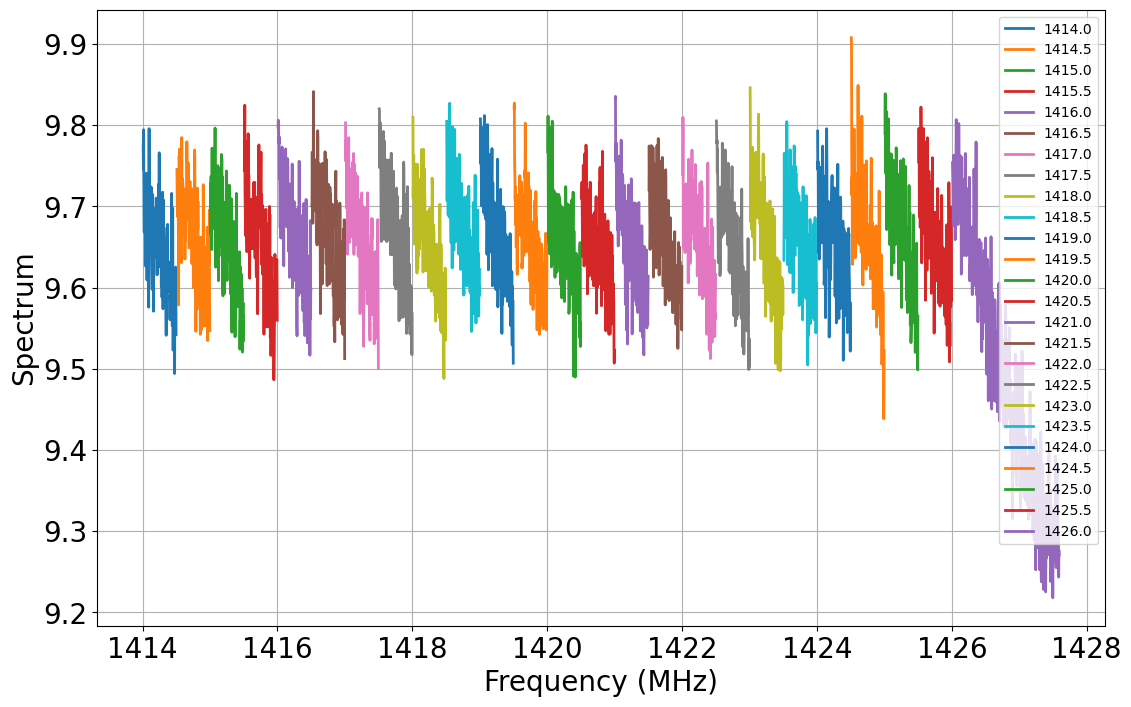

In [13]:
# Plotting

plt.figure(figsize=(13,8))

for i in range(len(center_of_frequencies)):
    plt.plot(filtered_frequencies[i], abs(filtered_spectrums[i])*1e6, linewidth = 2, label = center_of_frequencies[i])
    
    
    plt.ylabel("Spectrum", fontsize = 20)
    plt.xlabel("Frequency (MHz)", fontsize = 20)
    plt.legend(loc='upper right',fontsize=15,fancybox=True, shadow=True)
    plt.grid(True)
    plt.tick_params(labelsize=20)
    #plt.yscale('log')
    #plt.xlim(1420,1420.1)
    #plt.ylim(4.6, 5.8)
plt.legend()
plt.savefig("sun_obs_horn.png")

**machine learning**

In [97]:
frequency = np.concatenate(filtered_frequencies, axis=0).reshape(-1,1)
spectrum = np.concatenate(filtered_spectrums, axis=0)

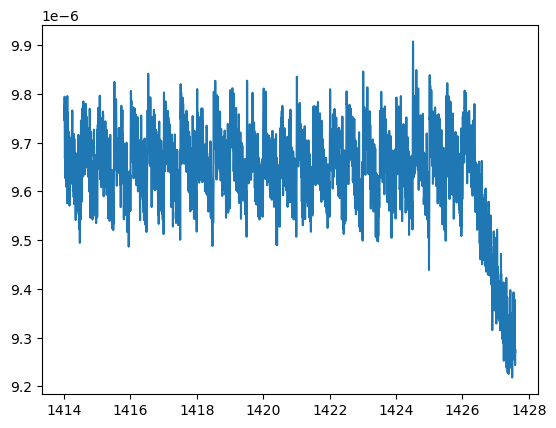

In [99]:
plt.plot(frequency, spectrum)

In [101]:
model = np.polyfit(frequency, spectrum, 1)

TypeError: expected 1D vector for x

In [103]:
frequency.shape
spectrum.shape

(4275,)

In [105]:
# Fitting the model
fitted_model = LinearRegression().fit(frequency, spectrum)

# Making predictions
predicted_spectrum = fitted_model.predict(frequency)

# Calculating R² score
r2 = r2_score(spectrum, predicted_spectrum)
print(f'R² score: {r2}')

R² score: 0.1230412075993681


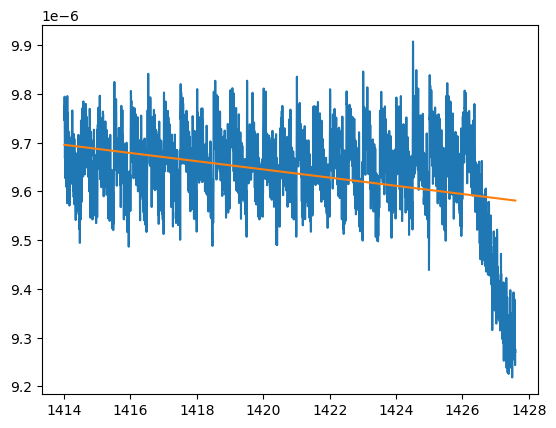

In [107]:
plt.plot(frequency, spectrum)
plt.plot(frequency, fitted_model.predict(frequency))

In [ ]:
fitted_model.predict([[1420]])